# Tutorial 3 - Classification Models
## Logistic regression, support vector machine, decision trees, ensemble learning (bagging, boosting)

## Overview

Welcome to the Python Tutorial on Classification Models! In this comprehensive guide, we will explore some of the fundamental classification algorithms used in machine learning. Classification is a supervised learning task where the goal is to assign input data points to specific categories or classes based on their features.

We will dive into four popular classification models:

1. Logistic Regression
2. Support Vector Machine (SVM)
3. Decision Trees
4. Ensemble Learning

For each model, we will cover the underlying principles, implementation in Python using various libraries, hyperparameter tuning, and evaluation techniques to ensure you have a solid understanding of how to apply these algorithms to real-world problems.

## Prerequisites

Before diving into this tutorial, make sure you have a basic understanding of Python programming and the concepts of supervised learning. Knowledge of NumPy, Pandas, and scikit-learn (a popular machine learning library in Python) will be beneficial.

## What You'll Learn

By the end of this tutorial, you will:

- Understand the principles of classification algorithms and when to use them.
- Know how to implement logistic regression, support vector machines, decision trees, and ensemble learning in Python.
- Be able to preprocess and prepare data for classification tasks.
- Learn about hyperparameter tuning to optimize the performance of your models.
- Evaluate classification models using various metrics and techniques.

## Problem Description

Consider again the probability of a student passing an exam.

A group of 20 students spend between 0 and 6 hours studying for an exam. How does the number of hours spent studying affect the probability that the student will pass the exam? The table shows the number of hours each student spent studying, and whether they passed (1) or failed (0).

Additionally, we consider a second variable, the previous passing rate, which is the number of courses a student has taken and passed divided by total number of courses that student has taken. 

The data is summarized in the table below.

## Data

|Student ID|Study Hours|Prev. Pass Rate|Pass?|
|---       |---        |---            |---  |
|1         |0.5        |0.4            |0|
|2         |0.75       |0.3            |0|
|3         |1          |0.6            |0|
|4         |1.25       |0.4            |0|
|5         |1.5        |0.7            |0|
|6         |1.75       |0.4            |0|
|7         |1.75       |1.0            |1|
|8         |2          |0.3            |0|
|9         |2.25       |0.9            |1|
|10        |2.5        |0.4            |0|
|11        |2.75       |0.7            |1|
|12        |3          |0.3            |0|
|13        |3.25       |0.6            |1|
|14        |3.5        |0.2            |0|
|15        |4          |0.7            |1|
|16        |4.25       |0.5            |1|
|17        |4.5        |0.7            |1|
|18        |4.75       |0.8            |1|
|19        |5          |0.7            |1|
|20        |5.5        |0.8            |1|

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
seed = 15

In [150]:
data = np.array([
        [1         ,0.5        ,0.4            ,0],
        [2         ,0.75       ,0.3            ,0],
        [3         ,1          ,0.6            ,0],
        [4         ,1.25       ,0.4            ,0],
        [5         ,1.5        ,0.7            ,0],
        [6         ,1.75       ,0.4            ,0],
        [7         ,1.75       ,1.0            ,1],
        [8         ,2          ,0.3            ,0],
        [9         ,2.25       ,0.9            ,1],
        [10        ,2.5        ,0.4            ,0],
        [11        ,2.75       ,0.7            ,1],
        [12        ,3          ,0.3            ,0],
        [13        ,3.25       ,0.6            ,1],
        [14        ,3.5        ,0.2            ,0],
        [15        ,4          ,0.7            ,1],
        [16        ,4.25       ,0.5            ,1],
        [17        ,4.5        ,0.7            ,1],
        [18        ,4.75       ,0.8            ,1],
        [19        ,5          ,0.7            ,1],
        [20        ,5.5        ,0.8            ,1],
])
np.random.seed(seed)
# shuffle the data
np.random.shuffle(data)
data_df = pd.DataFrame(data, columns=['ID', 'Hours', 'Prev', 'if_Pass'])
# seperate the data into a training set (first 50%) and a validation set (last 50%)
data_df_train = data_df.iloc[:10, :]
data_df_val = data_df.iloc[10:, :]


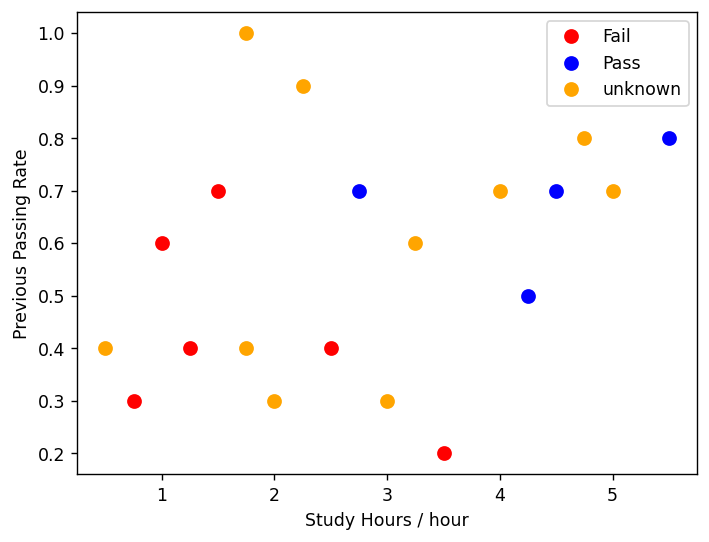

In [151]:
# visualization
plt.figure(dpi=125)
#! plots the passing data that is in the trainnig set, with the number of hours and the previous passing rate. 
plt.plot(data_df_train.loc[data_df['if_Pass']==0, 'Hours'], data_df_train.loc[data_df['if_Pass']==0, 'Prev'], 'r.', markersize=15, label='Fail')
#! plots the failing data that is in the trainnig set, with the number of hours and the previous passing rate. 
plt.plot(data_df_train.loc[data_df['if_Pass']==1, 'Hours'], data_df_train.loc[data_df['if_Pass']==1, 'Prev'], 'b.', markersize=15, label='Pass')
# ! plots all the testing data
plt.plot(data_df_val['Hours'], data_df_val['Prev'], '.', color='orange', markersize=15, label='unknown')
plt.xlabel('Study Hours / hour')
plt.ylabel('Previous Passing Rate')
plt.legend()



In [152]:
data_df_train

,ID,Hours,Prev,if_Pass
0,20.0,5.50,0.8,1.0
1,16.0,4.25,0.5,1.0
2,4.0,1.25,0.4,0.0
3,10.0,2.50,0.4,0.0
4,5.0,1.50,0.7,0.0
5,3.0,1.00,0.6,0.0
6,11.0,2.75,0.7,1.0
7,17.0,4.50,0.7,1.0
8,14.0,3.50,0.2,0.0
9,2.0,0.75,0.3,0.0


In [153]:
data_df_val

,ID,Hours,Prev,if_Pass
10,7.0,1.75,1.0,1.0
11,18.0,4.75,0.8,1.0
12,15.0,4.00,0.7,1.0
13,8.0,2.00,0.3,0.0
14,12.0,3.00,0.3,0.0
15,19.0,5.00,0.7,1.0
16,1.0,0.50,0.4,0.0
17,6.0,1.75,0.4,0.0
18,13.0,3.25,0.6,1.0
19,9.0,2.25,0.9,1.0


In [154]:
# define a function for calculating classification accuracy
def cal_acc(pred, y):
    pred = np.array(pred).flatten()
    y = np.array(y).flatten()
    return np.sum(pred==y) / pred.shape[0]

In [155]:
from sklearn.metrics import accuracy_score, precision_score, roc_curve

## Logistic Regression
You are encouraged to read this content (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) before going on.

In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
X = data_df_train[['Hours', 'Prev']]
y = data_df_train['if_Pass']
# make sure that there is no regulation term by setting penalty='none'
clf = LogisticRegression(random_state=seed, penalty='none').fit(X, y)


/Users/felixlaw/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [158]:
print('w0', clf.intercept_)
print('w1', clf.coef_)


w0 [-102.43670868]
w1 [[15.52717336 99.82842597]]


In [159]:
pred = clf.predict(data_df_val[['Hours', 'Prev']])
y = data_df_val['if_Pass']
print(cal_acc(pred, y))
print('The prediction accuracy for logistic regression is {:.4}%'.format(cal_acc(pred, y)*100))

1.0
The prediction accuracy for logistic regression is 100.0%


In [160]:
print('accuracy_score', accuracy_score(pred, y))
print('precision_score', precision_score(pred, y))

accuracy_score 1.0
precision_score 1.0


[0. 0. 1.]
[0. 1. 1.]


Text(0.5, 1.0, 'ROC Curve')

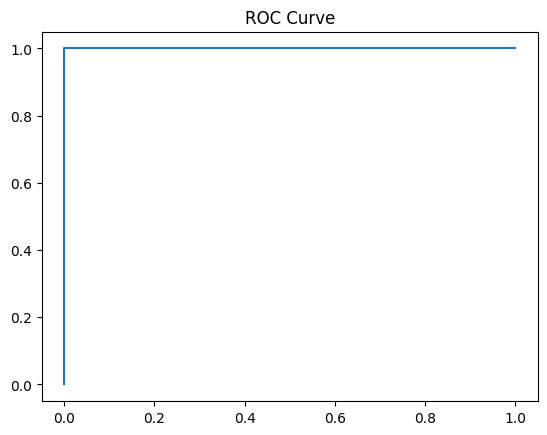

In [161]:
fpr, tpr, thresholds = roc_curve(pred, y)
print(fpr)
print(tpr)
plt.plot(fpr, tpr)
plt.title('ROC Curve')

## Support Vector Machine
You are encouraged to read this content (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) before going on.

In [162]:
from sklearn.svm import SVC

In [163]:
X = data_df_train[['Hours', 'Prev']]
y = data_df_train['if_Pass']
clf = SVC(C=100, kernel='linear').fit(X, y)  # make C larger, reduce regularization


In [164]:
print('w0', clf.intercept_)
print('w1 w2', clf.coef_)

w0 [-7.87898585]
w1 w2 [[1.60000317 6.39808405]]


In [165]:
pred = clf.predict(data_df_val[['Hours', 'Prev']])
y = data_df_val['if_Pass']
print('The prediction accuracy for support vector machine is {:.4}%'.format(cal_acc(pred, y)*100))

The prediction accuracy for support vector machine is 100.0%


In [166]:
print('accuracy_score', accuracy_score(pred, y))
print('precision_score', precision_score(pred, y))

accuracy_score 1.0
precision_score 1.0


Text(0.5, 1.0, 'ROC Curve')

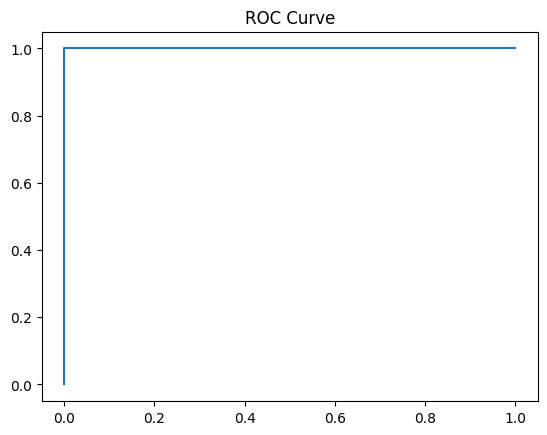

In [167]:
fpr, tpr, thresholds = roc_curve(pred, y)
plt.plot(fpr, tpr)
plt.title('ROC Curve')

In [168]:
data_df_val['if_Pass_pred'] = y

/var/folders/py/yncddnwd6kn7d9dzfmz1kcbm0000gn/T/ipykernel_42996/3824088305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df_val['if_Pass_pred'] = y


x_min 0.25 x_max 5.75
y_min 0.16 y_max 1.04


/Users/felixlaw/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


(0.16, 1.04)

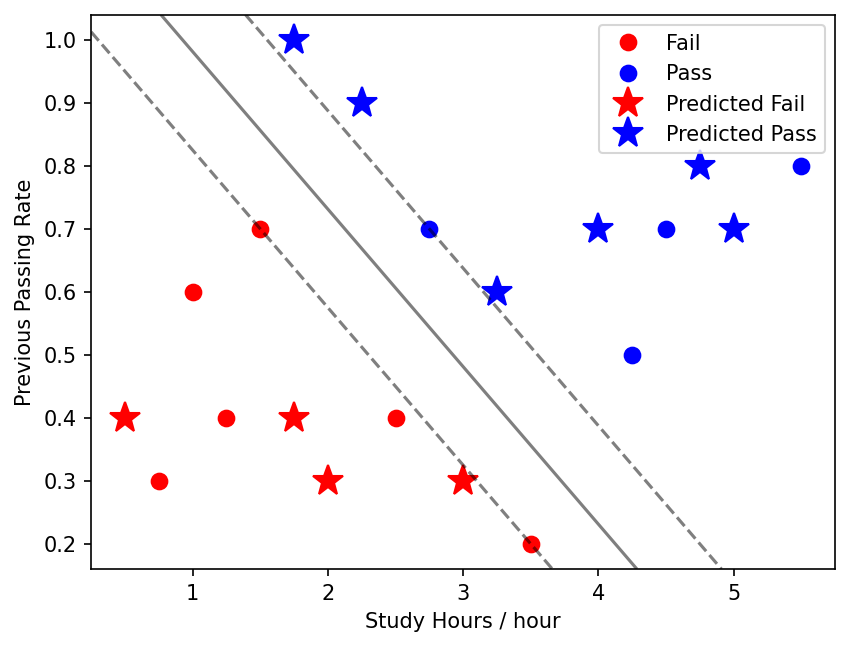

In [169]:
## visualization
# plot hyperplane
x1 = data_df_train['Hours'].to_numpy()
x2 = data_df_train['Prev'].to_numpy()
y = data_df_train['if_Pass'].to_numpy()

plt.figure(dpi=150)
plt.plot(data_df_train.loc[data_df_train['if_Pass']==0, 'Hours'], data_df_train.loc[data_df_train['if_Pass']==0, 'Prev'], 'r.', markersize=15, label='Fail')
plt.plot(data_df_train.loc[data_df_train['if_Pass']==1, 'Hours'], data_df_train.loc[data_df_train['if_Pass']==1, 'Prev'], 'b.', markersize=15, label='Pass')

plt.plot(data_df_val.loc[data_df_val['if_Pass_pred']==0, 'Hours'], data_df_val.loc[data_df_val['if_Pass_pred']==0, 'Prev'], 'r*', markersize=15, label='Predicted Fail')
plt.plot(data_df_val.loc[data_df_val['if_Pass_pred']==1, 'Hours'], data_df_val.loc[data_df_val['if_Pass_pred']==1, 'Prev'], 'b*', markersize=15, label='Predicted Pass')

# plt.plot(data_df_val['Hours'], data_df_val['Prev'], '.', color='orange', markersize=15, label='unknown')
plt.xlabel('Study Hours / hour')
plt.ylabel('Previous Passing Rate')
plt.legend(loc='upper right')

ax = plt.gca()  # obtain current subplot

# obtain the axis limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()
print('x_min {:.2f}'.format(xlim[0]), 'x_max {:.2f}'.format(xlim[1]))
print('y_min {:.2f}'.format(ylim[0]), 'y_max {:.2f}'.format(ylim[1]))

# plot the hyperplane
axisx = np.linspace(xlim[0], xlim[1], 50)
axisy = np.linspace(ylim[0], ylim[1], 50)
axisx, axisy = np.meshgrid(axisx, axisy)
# ! oh my god what is ravel() and what is vstack
# * vstack() is stacking matrix on top of each other
# * ravel() is unpacking matrix
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T

# * finds the SVM delinearation line over the xy axis limits
Z = clf.decision_function(xy).reshape(axisx.shape)

# * Draws a contour map
ax.contour(axisx, axisy, Z
           ,colors="k"
           ,levels=[-1, 0, 1] # draw three contours, for 1, 0, and -1
           ,alpha=0.5# transparancy
           ,linestyles=["--","-","--"])

# set axis limitations
ax.set_xlim(xlim)
ax.set_ylim(ylim)


## Decision Trees
A comprehensive intrduction of Decision Trees method is available via this link (https://scikit-learn.org/stable/modules/tree.html), provided by scikit-learn developers.

This section mainly adopts the part 1.10.1 of this documentation to our problem.

In [170]:
from sklearn import tree

In [171]:
X = data_df_train[['Hours', 'Prev']]
y = data_df_train['if_Pass']
clf = tree.DecisionTreeClassifier(random_state=seed)
clf = clf.fit(X, y)


[Text(0.4, 0.8333333333333334, 'x[0] <= 2.625\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.5, 'x[1] <= 0.35\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

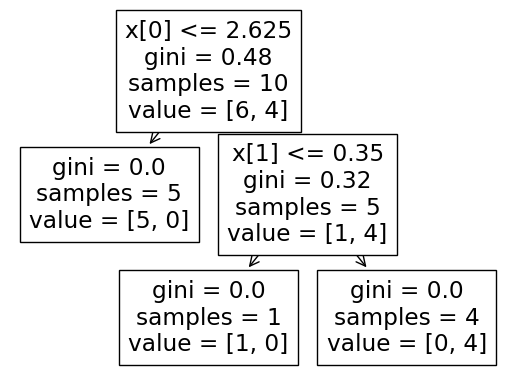

In [172]:
tree.plot_tree(clf)

In [173]:
pred = clf.predict(data_df_val[['Hours', 'Prev']])
y = data_df_val['if_Pass']
print('The prediction accuracy for decision trees is {:.4}%'.format(cal_acc(pred, y)*100))

The prediction accuracy for decision trees is 80.0%


In [174]:
print('accuracy_score', accuracy_score(pred, y))
print('precision_score', precision_score(pred, y))

accuracy_score 0.8
precision_score 0.6666666666666666


Text(0.5, 1.0, 'ROC Curve')

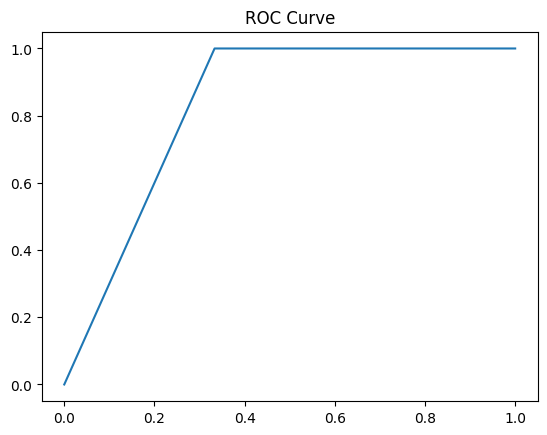

In [175]:
fpr, tpr, thresholds = roc_curve(pred, y)
plt.plot(fpr, tpr)
plt.title('ROC Curve')

## Bagging, Random Forest, and Boosting
These are clustered into Ensemble methods, which is comprehensively intrduced by scikit-learn developers (https://scikit-learn.org/stable/modules/ensemble.html). A list of supported ensembling methods on sklearn can be found here (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble). 

This section mainly adopts some methods in this documentation to our problem.


### Bagging
As introduced in lecture, bagging is an abbreviation for bootstrap aggregating.

You are encouraged to read this documentation content (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) before going on. 

The figure is adopted from Wikipedia (https://en.wikipedia.org/wiki/Out-of-bag_error).
<img src="./img/bagging_illustration.png" width=600>

In [176]:
from sklearn.ensemble import BaggingClassifier

X = data_df_train[['Hours', 'Prev']]
y = data_df_train['if_Pass']
# A base cllasifier should be claimed before using bagging
# if there is no such claimed, a DecisionTreeClassifier will
# be used as the base classifier.
# You can check the documentation for details.
clf = BaggingClassifier(random_state=seed)
clf.fit(X, y)

BaggingClassifier(random_state=15)

In [177]:
pred = clf.predict(data_df_val[['Hours', 'Prev']])
y = data_df_val['if_Pass']
print('The prediction accuracy for bagging with decision trees as base model is {:.4}%'.format(cal_acc(pred, y)*100))


The prediction accuracy for bagging with decision trees as base model is 90.0%


In [178]:
print('accuracy_score', accuracy_score(pred, y))
print('precision_score', precision_score(pred, y))

accuracy_score 0.9
precision_score 0.8333333333333334


Text(0.5, 1.0, 'ROC Curve')

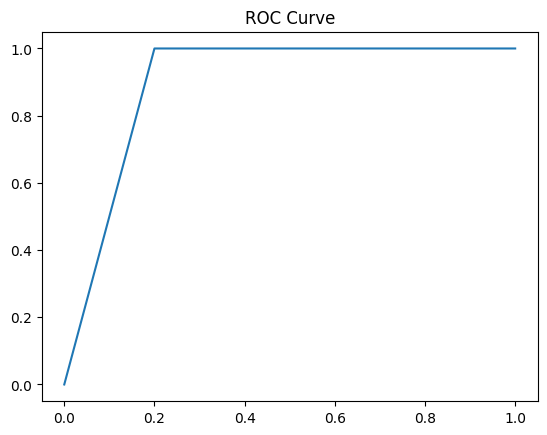

In [179]:
fpr, tpr, thresholds = roc_curve(pred, y)
plt.plot(fpr, tpr)
plt.title('ROC Curve')

#### Random Forest
You are encouraged to read this documentation content (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) before going on. 

Note: if all the variables are considered in the random forest, then it becomes bagging (using decision tree classifier). This can be achieved by setting max_features=None. You can check the documentation for details. 

In [180]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
X = data_df_train[['Hours', 'Prev']]
y = data_df_train['if_Pass']
clf = RandomForestClassifier(random_state=seed)
clf.fit(X, y)

RandomForestClassifier(random_state=15)

In [182]:
pred = clf.predict(data_df_val[['Hours', 'Prev']])
y = data_df_val['if_Pass']
print('The prediction accuracy for random forest is {:.4}%'.format(cal_acc(pred, y)*100))


The prediction accuracy for random forest is 90.0%


In [183]:
print('accuracy_score', accuracy_score(pred, y))
print('precision_score', precision_score(pred, y))

accuracy_score 0.9
precision_score 0.8333333333333334


Text(0.5, 1.0, 'ROC Curve')

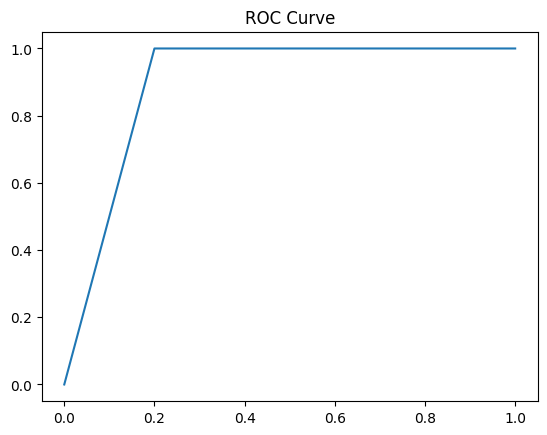

In [184]:
fpr, tpr, thresholds = roc_curve(pred, y)
plt.plot(fpr, tpr)
plt.title('ROC Curve')

### Boosting
#### Adaboost
An abbreviation for adaptive boosting. You are encouraged to read this documentation content (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) before going on. 

In [185]:
from sklearn.ensemble import AdaBoostClassifier

In [186]:
X = data_df_train[['Hours', 'Prev']]
y = data_df_train['if_Pass']
clf = AdaBoostClassifier(random_state=seed)
clf.fit(X, y)

AdaBoostClassifier(random_state=15)

In [187]:
pred = clf.predict(data_df_val[['Hours', 'Prev']])
y = data_df_val['if_Pass']
print('The prediction accuracy for adaboost is {:.4}%'.format(cal_acc(pred, y)*100))


The prediction accuracy for adaboost is 80.0%


In [188]:
print('accuracy_score', accuracy_score(pred, y))
print('precision_score', precision_score(pred, y))

accuracy_score 0.8
precision_score 0.6666666666666666


Text(0.5, 1.0, 'ROC Curve')

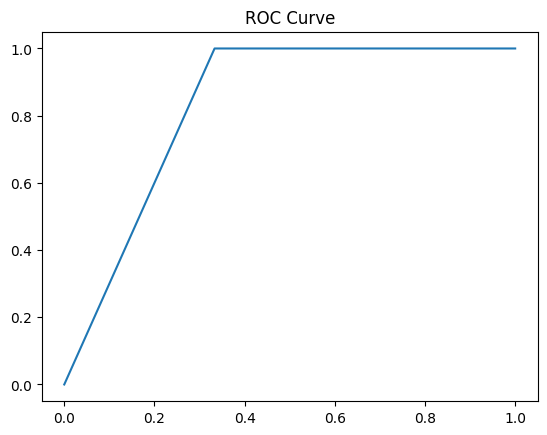

In [189]:
fpr, tpr, thresholds = roc_curve(pred, y)
plt.plot(fpr, tpr)
plt.title('ROC Curve')

#### Gradient Boosting Decision Tree (GBDT)
You are encouraged to read this documentation content (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier) before going on.

In [190]:
from sklearn.ensemble import GradientBoostingClassifier

In [191]:
X = data_df_train[['Hours', 'Prev']]
y = data_df_train['if_Pass']
clf = GradientBoostingClassifier(random_state=seed)
clf.fit(X, y)

GradientBoostingClassifier(random_state=15)

In [192]:
pred = clf.predict(data_df_val[['Hours', 'Prev']])
y = data_df_val['if_Pass']
print('The prediction accuracy for GBDT is {:.4}%'.format(cal_acc(pred, y)*100))


The prediction accuracy for GBDT is 80.0%


In [193]:
print('accuracy_score', accuracy_score(pred, y))
print('precision_score', precision_score(pred, y))

accuracy_score 0.8
precision_score 0.6666666666666666


Text(0.5, 1.0, 'ROC Curve')

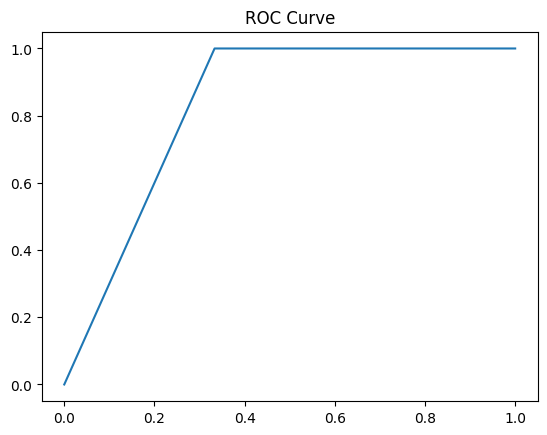

In [194]:
fpr, tpr, thresholds = roc_curve(pred, y)
plt.plot(fpr, tpr)
plt.title('ROC Curve')